Supplementary file 3
=================

In [1]:
# General incantations and imports
import pandas as pd
import seaborn as sns
import warnings
import matplotlib.pyplot as plt
warnings.filterwarnings("ignore")

from analysis import charts

plt.style.use('seaborn-white')
sns.set_context('paper')

In [2]:
full = pd.read_csv('https://zenodo.org/record/3693222/files/institutional_oa_evaluation_2020_full_paper_dataset_2020_02_12.csv?download=1')

In [3]:
## Helper functions ##

# Data cleanup required, mainly on country names #
def clean_geo_names(df):
    country_clean = { "country" : {
        "United Kingdom of Great Britain and Northern Ireland" : "United Kingdom",
        "Iran (Islamic Republic of)" : "Iran",
        "Korea, Republic of" : "South Korea",
        "Taiwan, Province of China" : "Taiwan"
                              }
                    }
    df.replace(to_replace = country_clean, inplace=True)

    df.loc[df.country.isin(['Canada', 'United States of America']), 'region'] = 'North America'
    df.replace('Americas', 'Latin America', inplace=True)
    return df

# Creating nice column names for graphing
def nice_column_names(df):
    cols = [
        ('Open Access (%)', 'percent_oa'),
        ('Total Green OA (%)', 'percent_green'),
        ('Total Gold OA (%)', 'percent_gold'),
        ('Gold DOAJ (%)', 'percent_gold_just_doaj'),
        ('Green in Institutional Repository (%)', 'percent_in_home_repo'),
        ('Hybrid OA (%)', 'percent_hybrid'),
        ('Total Publications', 'total'),
        ('Change in Open Access (%)', 'total_oa_pc_change'),
        ('Change in Green OA (%)', 'green_pc_change'),
        ('Change in Gold OA (%)', 'gold_pc_change'),
        ('Change in Total Publications (%)', 'total_pc_change'),        
        ('Year of Publication', 'published_year'),
        ('University Name', 'name'),
        ('Region', 'region'),
        ('Country', 'country'),
            ]
    for col in cols:
        if col[1] in df.columns.values:
            df[col[0]] = df[col[1]]

    return df

In [4]:
# Do the data cleanup and a few calculations for graphing
clean_geo_names(full)
full = nice_column_names(full)


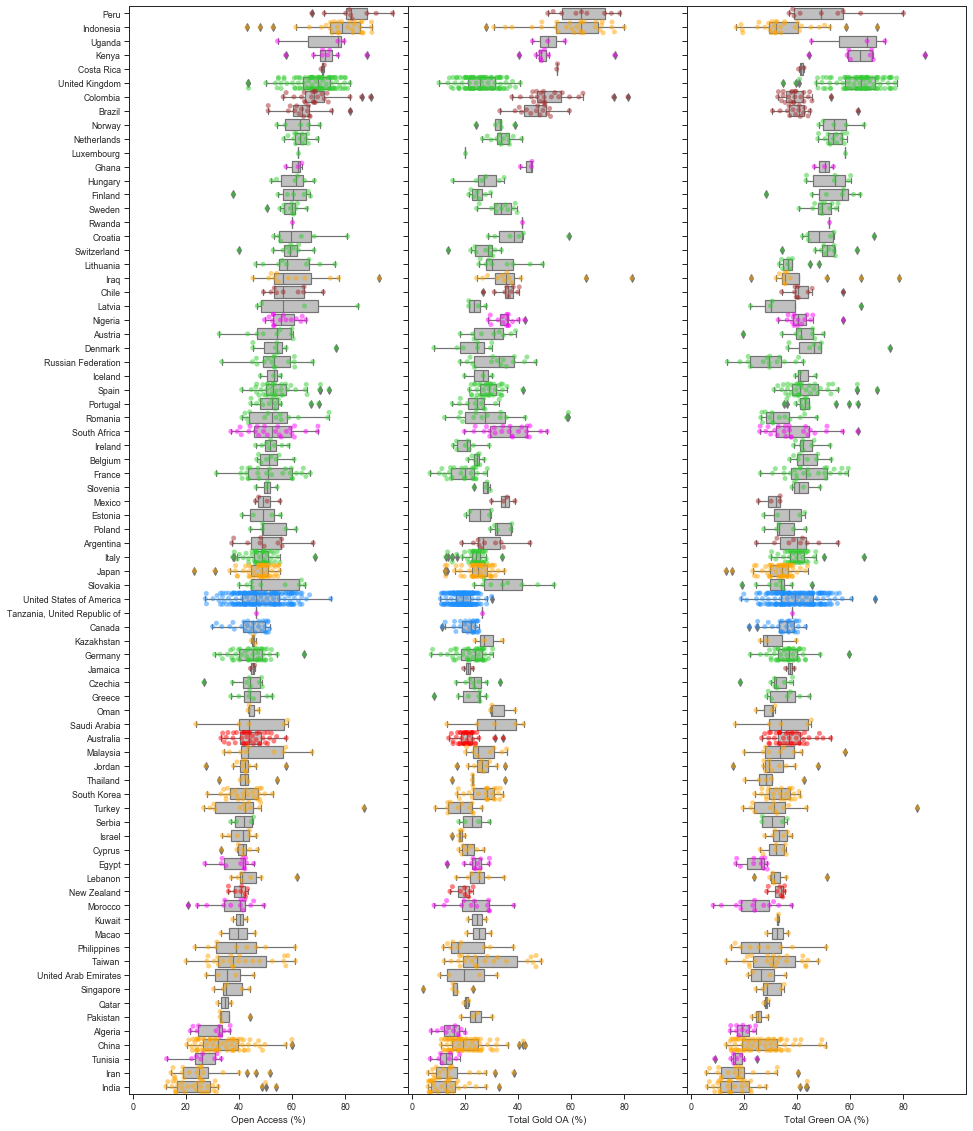

In [5]:
figures = charts.BoxScatter(full, 2017, 'country', ['Open Access (%)',
                                                         'Total Gold OA (%)',
                                                         'Total Green OA (%)'])
figures.process_data()
figures.plot();